# Continuous Control

---
Udacity Deep Reinforcement Learning Nanodegree

Capstone 2 :  Continuous Control with Unity ML-Agents Reacher Environment

---
Swastik Nath.

IMPLEMENTATION IN COURTESY OF UDACITY.

---


### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


### Specifics about the Environment:
The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below. At the first, we select the single agent version, and then we will look into the multi-agent version.

---
#### A. Selecting the Single Agent:


In [3]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

### 4. Training the Agents with DDPG:
---
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
``` 
We train the agents by importing the implementation of the DDPG Actor-Critic Agent from the **agent.py** file by importing the class.
```
from agent import Agent
```

In [ ]:
from agent import Agent

In [5]:
agent = Agent(state_size, action_size, 42)
print(agent.actor_online)
print(agent.critic_online)
print(f"Working with Multiple Agents: {agent.parallal}")

Actor(
  (fc1): Linear(in_features=33, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Critic(
  (fc1): Linear(in_features=33, out_features=128, bias=True)
  (fc2): Linear(in_features=132, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Working with Multiple Agents: False


In [6]:
from collections import deque
import torch
def ddpg(n_episodes = 2000, max_t=1000, print_every=100):
    scores = []
    scores_deque = deque(maxlen=100)
    
    for ii in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
        
            agent.step(state, action, reward, next_state, done)
            
            score += reward
            state = next_state
            if done:
                break
        
        scores_deque.append(score)
        scores.append(score)
            
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)), end="")
        
        if ii % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)))

        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ii-100, np.mean(scores_deque)))
            torch.save(agent.actor_online.state_dict(), 'weights_actor_v1.pth')
            torch.save(agent.critic_online.state_dict(), 'weights_critic_v1.pth')
            break
            
    return scores

In [7]:
scores = ddpg(n_episodes=500)

Episode 100	Average Score: 8.41
Episode 200	Average Score: 29.26
Episode 214	Average Score: 30.04
Environment solved in 114 episodes!	Average Score: 30.04


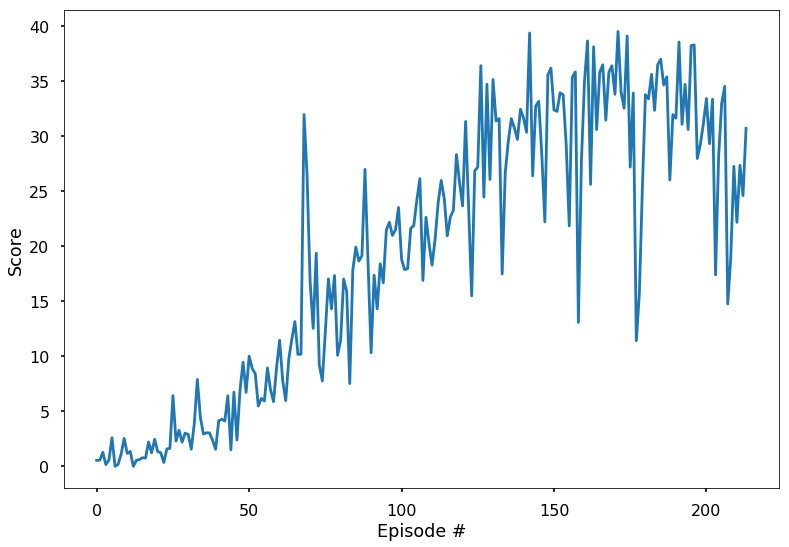

In [9]:
# scores = np.random.normal(0, 0.1, 1000)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)    
plt.ylabel('Score')
plt.xlabel('Episode #')   
plt.show()

In [12]:
env.close()

### Multi-Agent Environment:
Below we train the multi-agent environment of the Agent along with the Reacher Environment Version 2 with 20 Agents interacting with the environment simultaneously. My Actor-Critic Implementation has been provisioned to be re-used with one or multi-agent environments.

**Please Refresh the Workspace before Executing the Code below.**

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


#### Enabling the Multi-Agent Version of the Implementation:
In the below, I have enabled the flag **parallal=True** and **num_agent** to specify the number of agents working in an environment. In my implementation I have taken consideration of both single and multiple agents in the environment. 

In [3]:
from agent import Agent
agent = Agent(state_size, action_size, random_seed=42, parallal=True, num_agents=num_agents)
#making sure working with multi-agent version.
print(f"Working with Multiple Agents: {agent.parallal}")

Working with Multiple Agents: True


In [4]:
import torch
from collections import deque
def multi_agents_ddpg(n_episodes=1000, max_t=1000, print_every=100):
    scores = []
    scores_deque = deque(maxlen=100)
    
    for ii in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations
        score = np.zeros(num_agents)
        
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            
            score += reward
            state = next_state
            if np.any(done):
                break
        
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
            
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)), end="")
        
        if ii % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)))

        if np.mean(scores_deque)>=30.0:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ii-100, np.mean(scores_deque)))
            torch.save(agent.actor_online.state_dict(), 'weights_actor.pth')
            torch.save(agent.critic_online.state_dict(), 'weights_critic.pth') 
    return scores

In [ ]:
#Takes a very long time to complete even with GPU might result in an abrupt terminaton.
scores = multi_agents_ddpg(n_episodes=500) 

Episode 100	Average Score: 29.13
Episode 200	Average Score: 37.86
Episode 300	Average Score: 38.25
Episode 400	Average Score: 38.09
Episode 452	Average Score: 38.20

In [5]:
%%time
scores = multi_agents_ddpg(n_episodes=200)

Episode 100	Average Score: 28.65
Episode 200	Average Score: 37.43
CPU times: user 1h 7min 26s, sys: 2min 4s, total: 1h 9min 30s
Wall time: 1h 17min 18s


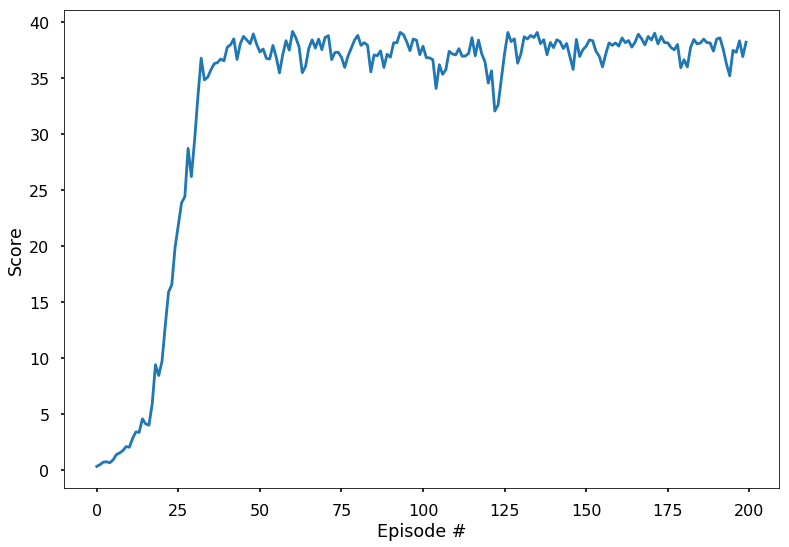

In [6]:
# scores = np.random.normal(0, 0.1, 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)    
plt.ylabel('Score')
plt.xlabel('Episode #')   
plt.show()

### Starting From Checkpoint:
---
We will now start from the checkpoint with trained and saved model weights to get performance review of the inference on both the multi and single agent environment.

In [2]:
import torch
from agent import Agent
from unityagents import UnityEnvironment
import numpy as np
def infer_from_checkpoint(env_version=1, checkpoint_path=['weights_actor.pth', 'weights_critic.pth']):
    
    env_file = {1:'/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64', 
                2: '/data/Reacher_Linux_NoVis/Reacher.x86_64'}
    
    env = UnityEnvironment(file_name=env_file[env_version])

    # select this option to load version 2 (with 20 agents) of the environment
    # env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=True)[brain_name]

    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)

    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)

    # examine the state space 
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
    print('The state for the first agent looks like:', states[0])
    
    if env_version == 1:
        agent = Agent(state_size, action_size, 42)
    else:
        agent = Agent(state_size, action_size, random_seed=42, parallal=True, num_agents=num_agents)
    
    actor_online_in = torch.load(checkpoint_path[0])
    critic_online_in = torch.load(checkpoint_path[1])
    agent.actor_online.load_state_dict(actor_online_in)
    agent.critic_online.load_state_dict(critic_online_in)
    
    mean_score = 0
    
    if agent.parallal:
        print("Status: Multi-Agent")
        states = env_info.vector_observations
        agent.reset() # set the noise to zero
        score = np.zeros(num_agents)
        while True:
            actions = agent.act(states, noisy=False) 
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations             
            rewards = env_info.rewards                           
            dones = env_info.local_done                           
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            if np.any(dones):
                break 
        mean_score = np.mean(score)
    
    else:
        print("Status : Single Agent")
        agent.reset()
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
        
            agent.step(state, action, reward, next_state, done)
            
            score += reward
            state = next_state
            if done:
                break
        mean_score = score
    print(f"Accumulated Score = {mean_score}")

In [ ]:
# select this when using version 1 of the Environemnt
# infer_from_checkpoint(checkpoint_path=['weights_actor_v1.pth', 'weights_critic_v1.pth'])
# select this when using version 2 of the Environment
infer_from_checkpoint(env_version=2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]
Status: Multi-Agent


### Closing The Environment:
---

In [ ]:
env.close()